In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

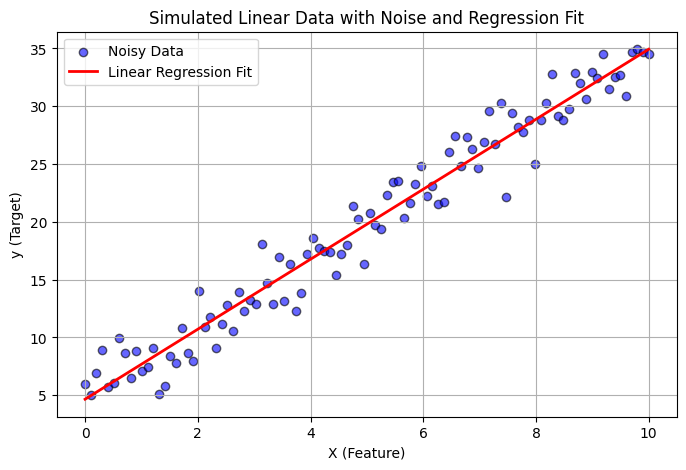

In [2]:

np.random.seed(42)  # For reproducibility
n_samples = 100

# Generate X values (independent variable)
X = np.linspace(0, 10, n_samples).reshape(-1, 1)

# Define true relationship (y = 3X + 5 + noise)
noise = np.random.normal(scale=2.0, size=(n_samples, 1))  # Add some noise
y = 3 * X + 5 + noise  # Linear relationship with noise

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Noisy Data", alpha=0.6, color="blue", edgecolor="black")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression Fit")

# Labels and title
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Simulated Linear Data with Noise and Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [164]:
def get_gradient(X, y, betas):

    X = np.c_[np.ones(X.shape[0]), X]
    dim = betas.shape[0]
    M = np.ndarray(shape=(dim,dim))

    #M matrix
    M[0][0] = 1
    M[0][1] = np.sum(X)
    M[1][0] = np.sum(X)
    M[1][1] = np.sum(np.square(X))


    b = np.ndarray(shape=(2,1))
    
    b[0] = sum(y)
    b[1] = np.dot(X.T, y)

    betas = np.atleast_2d(betas)
    betas[:, np.newaxis]
    gradient = (1/100) * X.T @ (X @ betas)

    # gradient = np.atleast_2d(gradient).T
    # gradient[:, np.newaxis]
                
    
    gradient = np.subtract(gradient, y)
    return gradient


# def get_gradient(X, y, betas):
#     X = np.array(X)  # Ensure X is a NumPy array
#     y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
#     betas = betas.reshape(-1, 1)  # Ensure betas is a column vector
    
#     m = X.shape[0]  # Number of samples
    
#     gradient = (1/m) * X.T @ (X @ betas - y)  # Correct gradient computation
    
#     return gradient

    

In [165]:
def loss(betas, y, X):
    y_hat = betas[1]*X
    y_hat = y_hat + betas[0]
    
    E = np.sum(np.square(y - y_hat))

    return E

In [166]:
def gradient_steps(betas, learning_rt, error_margin, X, y):
    
    grad_step = betas - learning_rt*get_gradient(X, y, betas)
    grad_step = np.log(grad_step)
    
    while loss(betas, y, X) > error_margin:
        grad_step = grad_step - learning_rt*(get_gradient(X, y, grad_step))
        print(grad_step)

    return grad_step


# def gradient_steps(betas, learning_rt, error_margin, X, y):
    
#     grad_step = betas - learning_rt * get_gradient(X, y, betas)
    
#     while loss(grad_step, y, X) > error_margin:
#         grad_step = grad_step - learning_rt * get_gradient(X, y, grad_step)

#     return grad_step  # Fix return variable

    

In [167]:
betas = np.array([5, 2])

betas.shape
print(betas.shape)

print(get_gradient([10, 10, 10], [5, 5, 5], betas))

(2,)


AttributeError: 'list' object has no attribute 'shape'

In [168]:
def fit(X, y):
    betas = np.array([0.5,0.5])
    betas = gradient_steps(betas, 0.00001, 10**(-3), X, y)
    y_hat = betas[1]*X
    y_hat = y_hat + betas[0]

    return y_hat

In [169]:
y_pred = fit(X, y)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Noisy Data", alpha=0.6, color="blue", edgecolor="black")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression Fit")

# Labels and title
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Simulated Linear Data with Noise and Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

Predicted values  [12.43 30.77  5.1 ]
Real values       [10.57680072 32.8914103   6.90143768]
Trained W         3.03
Trained b         4.49


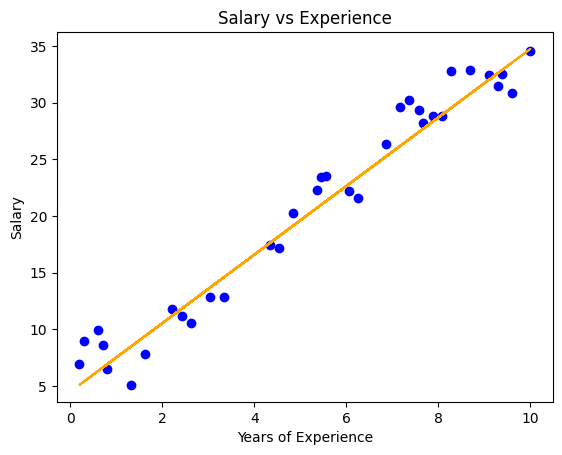

In [172]:
import numpy as np 
  
import pandas as pd 
  
from sklearn.model_selection import train_test_split 
  
import matplotlib.pyplot as plt 
  
# Linear Regression 
  
class LinearRegression() : 
      
    def __init__( self, learning_rate, iterations ) : 
          
        self.learning_rate = learning_rate 
          
        self.iterations = iterations 
          
    # Function for model training 
              
    def fit( self, X, Y ) : 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X.shape 
          
        # weight initialization 
          
        self.W = np.zeros( self.n ) 
          
        self.b = 0
          
        self.X = X 
          
        self.Y = Y 
          
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) : 
              
            self.update_weights() 
              
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) : 
             
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients   
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m 
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights 
      
        self.W = self.W - self.learning_rate * dW 
      
        self.b = self.b - self.learning_rate * db 
          
        return self
      
    # Hypothetical function  h( x )  
      
    def predict( self, X ) : 
      
        return X.dot( self.W ) + self.b 
     
  
# driver code 
  
def main() : 
      
    # Importing dataset 
      
    #df = pd.read_csv( "salary_data.csv" ) 

    np.random.seed(42)  # For reproducibility
    n_samples = 100
    
    # Generate X values (independent variable)
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    
    # Define true relationship (y = 3X + 5 + noise)
    noise = np.random.normal(scale=2.0, size=(n_samples, 1))  # Add some noise
    y = 3 * X + 5 + noise  # Linear relationship with noise
    df = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])
  
    X = df.iloc[:,:-1].values 
  
    Y = df.iloc[:,1].values 
      
    # Splitting dataset into train and test set 
  
    X_train, X_test, Y_train, Y_test = train_test_split(  
      X, Y, test_size = 1/3, random_state = 0 ) 
      
    # Model training 
      
    model = LinearRegression( iterations = 1000, learning_rate = 0.01 ) 
  
    model.fit( X_train, Y_train ) 
      
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )  
      
    print( "Real values      ", Y_test[:3] ) 
      
    print( "Trained W        ", round( model.W[0], 2 ) ) 
      
    print( "Trained b        ", round( model.b, 2 ) ) 
      
    # Visualization on test set  
      
    plt.scatter( X_test, Y_test, color = 'blue' ) 
      
    plt.plot( X_test, Y_pred, color = 'orange' ) 
      
    plt.title( 'Salary vs Experience' ) 
      
    plt.xlabel( 'Years of Experience' ) 
      
    plt.ylabel( 'Salary' ) 
      
    plt.show() 
     
if __name__ == "__main__" :  
      
    main()